In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("breast_cancer.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
fm=df.iloc[:,2:-1]
tv=df.diagnosis

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
fm_train,fm_test,tv_train,tv_test=train_test_split(fm,tv,test_size=0.2)

In [9]:
print(fm_train.shape)

(455, 30)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()

In [12]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.fit(X=fm_train,y=tv_train)

C:\Users\Siddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
model.score(fm_train,tv_train)

0.9538461538461539

In [15]:
model.score(fm_test,tv_test)

0.9473684210526315

In [16]:
tv_train.value_counts()

B    294
M    161
Name: diagnosis, dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(y_true=tv_train,y_pred=model.predict(fm_train))

array([[284,  10],
       [ 11, 150]], dtype=int64)

In [19]:
confusion_matrix(y_true=tv_test,y_pred=model.predict(fm_test))

array([[63,  0],
       [ 6, 45]], dtype=int64)

In [20]:
(277+160)/(277+6+12+160)

0.9604395604395605

In [21]:
(69+37)/(69+5+3+37)

0.9298245614035088

In [22]:
print(classification_report(y_true=tv_train, y_pred=model.predict(X=fm_train)))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96       294
           M       0.94      0.93      0.93       161

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



In [23]:
np.set_printoptions(suppress=True)

In [24]:
model.predict(X=fm_train)

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B

In [34]:
preds = model.predict_proba(X=fm_train)

In [35]:
preds.shape

(455, 2)

In [36]:
preds=preds[:,0]

In [37]:
preds

array([0.99912538, 0.9863877 , 0.95268874, 0.99714804, 0.99959556,
       0.99718367, 0.99880046, 0.60398218, 0.99820647, 0.98964648,
       0.99963618, 0.95781366, 0.98190839, 0.99847606, 0.99791516,
       0.99573314, 0.99865488, 0.99189423, 0.99993711, 0.83255043,
       0.9868897 , 0.99916176, 0.00005977, 0.86672819, 0.99695869,
       0.99976817, 0.30216218, 0.99594613, 0.99999568, 0.00000137,
       0.00241353, 0.37407822, 0.99540508, 0.86254092, 0.00060159,
       0.98589583, 0.82223996, 0.        , 0.00000143, 0.98852436,
       0.00008585, 0.9887118 , 0.40602933, 0.96673861, 0.45601159,
       0.        , 0.99817749, 0.71016944, 0.99882711, 0.98799964,
       0.        , 0.94160325, 0.78481539, 0.        , 0.        ,
       0.99906005, 0.96650981, 0.00518807, 0.99714724, 0.99843127,
       0.9840893 , 0.94574694, 0.        , 0.97446424, 0.        ,
       0.9365824 , 0.99698197, 0.        , 0.00000023, 0.00000002,
       0.57246479, 0.19687195, 0.99366596, 0.        , 0.99438

In [38]:
preds=model.predict_proba(fm_train)
preds=(preds[:,0] > 0.5)
preds=np.where(preds==True,'M','B')

confusion_matrix(y_true=tv_train,y_pred=preds)

array([[ 10, 284],
       [150,  11]], dtype=int64)

In [39]:
preds=model.predict_proba(fm_train)
preds=(preds[:,0] >0.35)
preds=np.where(preds==True,'M','B')

confusion_matrix(y_true=tv_train,y_pred=preds)

array([[  2, 292],
       [146,  15]], dtype=int64)

In [40]:
for i in np.arange(0,1,0.05):
    print("Threshold is",i)
    print("-----------")
    
    preds=model.predict_proba(fm_train)
    preds=(preds[:,0] > i)
    preds=np.where(preds==True,'B','M')
    
    print("Train")
    print(confusion_matrix(y_true=tv_train,y_pred=preds))
    
    preds=model.predict_proba(fm_test)
    preds=(preds[:,0] > i)
    preds=np.where(preds == True,'B','M')
    
    print("test")
    print(confusion_matrix(y_true=tv_test,y_pred=preds))

Threshold is 0.0
-----------
Train
[[294   0]
 [151  10]]
test
[[63  0]
 [49  2]]
Threshold is 0.05
-----------
Train
[[294   0]
 [ 37 124]]
test
[[63  0]
 [11 40]]
Threshold is 0.1
-----------
Train
[[294   0]
 [ 33 128]]
test
[[63  0]
 [ 9 42]]
Threshold is 0.15000000000000002
-----------
Train
[[294   0]
 [ 28 133]]
test
[[63  0]
 [ 7 44]]
Threshold is 0.2
-----------
Train
[[293   1]
 [ 24 137]]
test
[[63  0]
 [ 7 44]]
Threshold is 0.25
-----------
Train
[[293   1]
 [ 18 143]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.30000000000000004
-----------
Train
[[293   1]
 [ 17 144]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.35000000000000003
-----------
Train
[[292   2]
 [ 15 146]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.4
-----------
Train
[[289   5]
 [ 14 147]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.45
-----------
Train
[[287   7]
 [ 14 147]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.5
-----------
Train
[[284  10]
 [ 11 150]]
test
[[63  0]
 [ 6 45]]
Threshold is 0.55
-----------
Train
[[283  11]


In [32]:
for i in np.arange(0,1,0.05):
                         
    preds=model.predict_proba(fm_train)
    preds=(preds[:,0] > i)
    preds=np.where(preds==True,'B','M')
    
    
    print(confusion_matrix(y_true=tv_train,y_pred=preds) > 0.5)

[[ True False]
 [ True  True]]
[[ True False]
 [ True  True]]
[[ True False]
 [ True  True]]
[[ True False]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [False  True]]
[[ True  True]
 [False  True]]


# SVM Model

In [ ]:
from sklearn.svm import SVC

In [43]:
model = SVC(gamma='auto', C=10, kernel='linear', probability=True)

In [44]:
model

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
model.fit(fm_train, tv_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
model.score(fm_train, tv_train)

0.9714285714285714

In [47]:
model.score(fm_test, tv_test)

0.9473684210526315

In [48]:
confusion_matrix(y_true=tv_train, y_pred=model.predict(fm_train))

array([[289,   5],
       [  8, 153]], dtype=int64)

In [49]:
confusion_matrix(y_true=tv_test, y_pred=model.predict(fm_test))

array([[63,  0],
       [ 6, 45]], dtype=int64)

In [50]:
(289+153)/(289+5+8+153)

0.9714285714285714

In [52]:
(63+45)/(63+0+6+45)

0.9473684210526315

In [53]:
model.predict_proba(fm_train)

array([[0.99889849, 0.00110151],
       [0.93884429, 0.06115571],
       [0.88286498, 0.11713502],
       [0.99787482, 0.00212518],
       [0.99977384, 0.00022616],
       [0.93926546, 0.06073454],
       [0.99676817, 0.00323183],
       [0.76653379, 0.23346621],
       [0.99783122, 0.00216878],
       [0.99233283, 0.00766717],
       [0.99888247, 0.00111753],
       [0.93282319, 0.06717681],
       [0.97379233, 0.02620767],
       [0.99829941, 0.00170059],
       [0.99113324, 0.00886676],
       [0.98004233, 0.01995767],
       [0.99854793, 0.00145207],
       [0.98991812, 0.01008188],
       [0.99994908, 0.00005092],
       [0.85917701, 0.14082299],
       [0.98577448, 0.01422552],
       [0.9985323 , 0.0014677 ],
       [0.00378805, 0.99621195],
       [0.86905968, 0.13094032],
       [0.99494382, 0.00505618],
       [0.99972454, 0.00027546],
       [0.24506897, 0.75493103],
       [0.99518542, 0.00481458],
       [0.9999999 , 0.0000001 ],
       [0.        , 1.        ],
       [0.

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(tv_test,preds)*100

87.71929824561403

# DecisionTreemodel

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=15)

In [61]:
model.fit(X=fm_train, y=tv_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
model.score(X=fm_train, y=tv_train)

0.9714285714285714

In [63]:
model.score(X=fm_test, y=tv_test)

0.9649122807017544

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
# Training Data
confusion_matrix(y_true=tv_train, y_pred=model.predict(fm_train))

array([[294,   0],
       [ 13, 148]], dtype=int64)

In [66]:
# Test Data
confusion_matrix(y_true=tv_test, y_pred=model.predict(fm_test))

array([[63,  0],
       [ 4, 47]], dtype=int64)

In [68]:
!pip install pydotplus

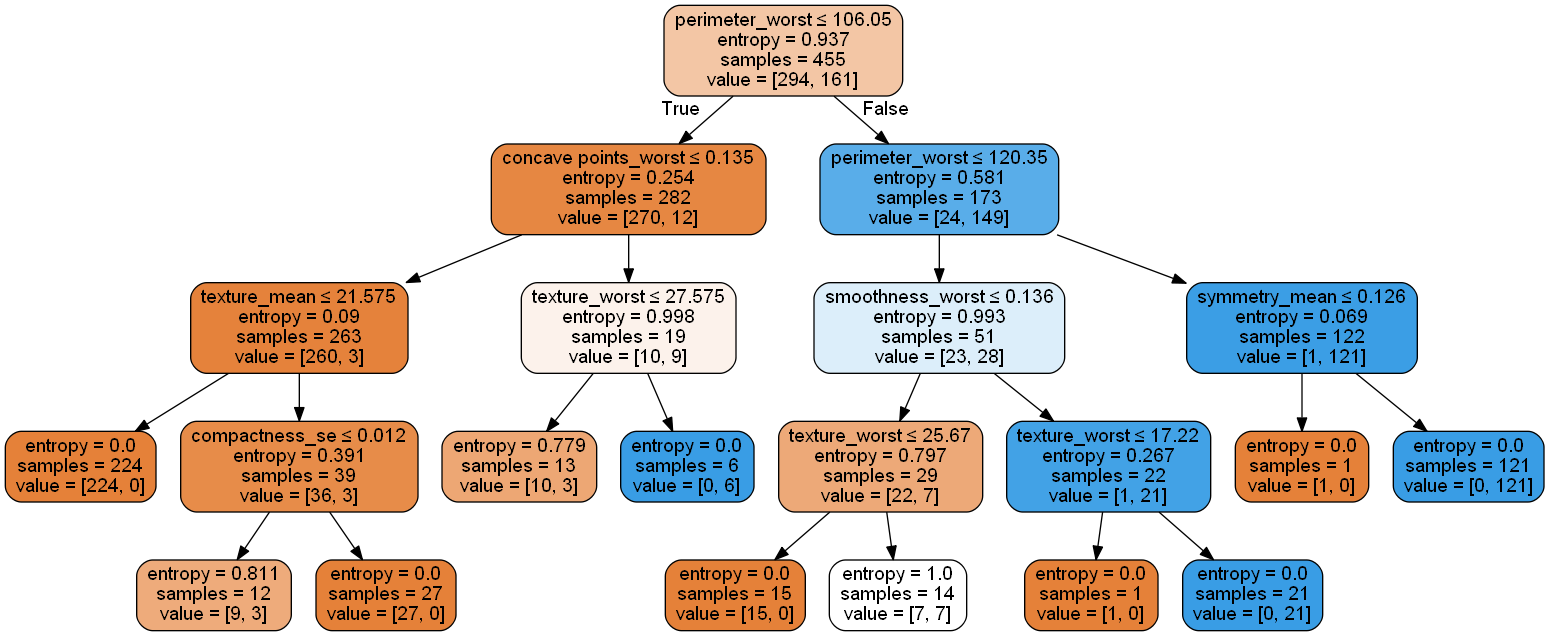

In [69]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = fm_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [70]:
model.predict_proba(fm_train)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.76923077, 0.23076923],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

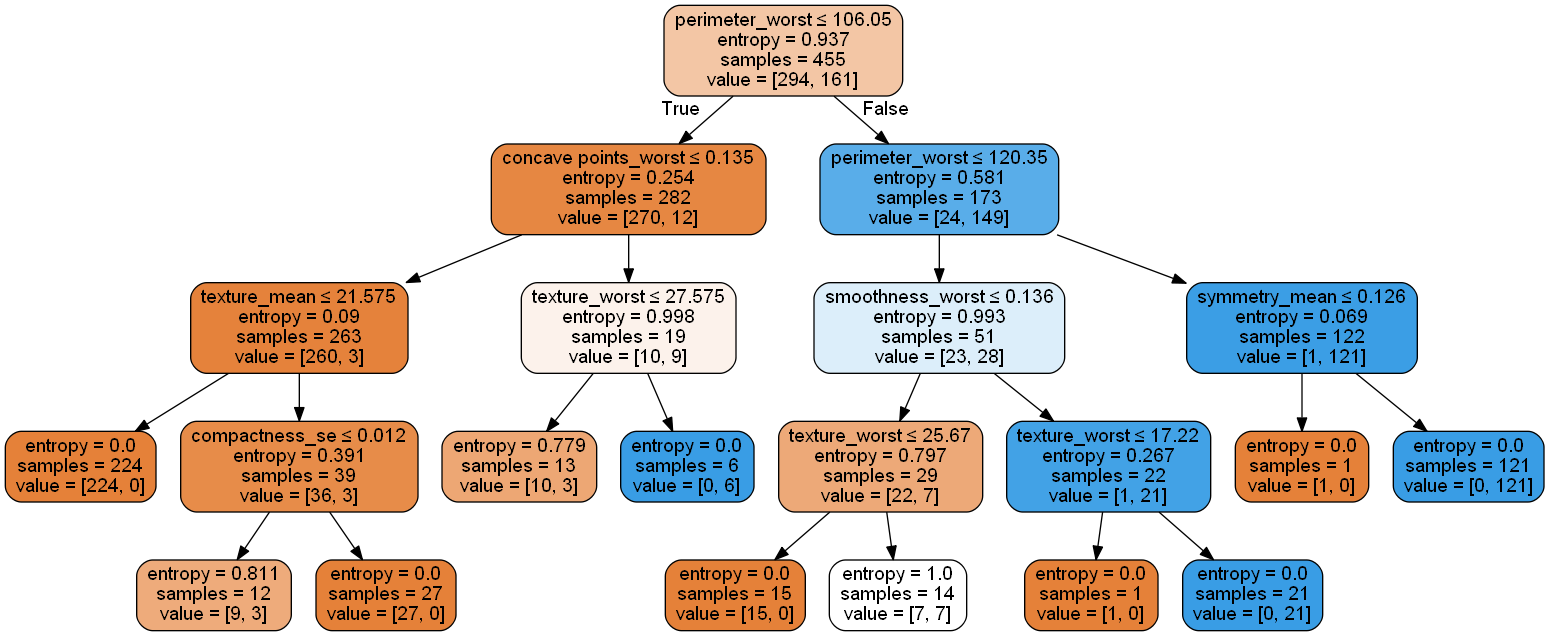

In [71]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = fm_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model = RandomForestClassifier(n_estimators=100)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
model.fit(fm_train, tv_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
confusion_matrix(y_true=tv_train, y_pred=model.predict(fm_train))

array([[294,   0],
       [  0, 161]], dtype=int64)

In [77]:
confusion_matrix(y_true=tv_test, y_pred=model.predict(fm_test))

array([[63,  0],
       [ 4, 47]], dtype=int64)

In [79]:
model.predict_proba(fm_test)

array([[0.91, 0.09],
       [0.17, 0.83],
       [0.57, 0.43],
       [0.9 , 0.1 ],
       [0.78, 0.22],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.72, 0.28],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.87, 0.13],
       [0.91, 0.09],
       [0.08, 0.92],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.38, 0.62],
       [0.17, 0.83],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.16, 0.84],
       [0.41,

In [80]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(tv_test,preds)*100

87.71929824561403